In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [4]:
data_path_train = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')

In [5]:
faces_train_data = pd.read_csv(data_path_train, delimiter=',')

In [6]:
data_path_test = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')

In [7]:
faces_test_data = pd.read_csv(data_path_test, delimiter=',')

In [8]:
faces_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 5.0 MB


In [9]:
faces_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 137 entries, x0 to smiling
dtypes: float64(136), int64(1)
memory usage: 1.3 MB


In [10]:
faces_train_data.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,...,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,...,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,...,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,...,-0.070,0.891,-0.035,0.283,-0.279,0.000,-0.279,-0.283,-0.244,0
4,-1.776,1.551,-1.693,1.140,-1.549,0.729,-1.363,0.318,-1.115,-0.075,...,-0.093,0.764,0.056,0.227,-0.112,0.041,-0.150,-0.145,-0.131,0


In [11]:
faces_test_data.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-3.109,1.440,-3.067,0.847,-2.982,0.212,-2.811,-0.381,-2.385,-0.847,...,-0.085,0.383,-0.000,0.170,-0.127,0.000,-0.212,-0.213,-0.212,1
1,-2.747,1.159,-2.693,0.669,-2.585,0.223,-2.424,-0.268,-2.208,-0.669,...,-0.089,0.485,-0.134,0.269,-0.357,0.054,-0.446,-0.215,-0.446,0
2,-2.370,1.604,-2.326,1.130,-2.238,0.656,-2.107,0.182,-1.843,-0.255,...,-0.109,0.571,-0.146,0.176,-0.146,0.000,-0.146,-0.219,-0.146,0
3,-2.696,2.059,-2.684,1.503,-2.620,0.935,-2.505,0.378,-2.262,-0.116,...,-0.053,0.422,-0.042,0.153,-0.137,-0.038,-0.179,-0.256,-0.168,0
4,-2.072,2.017,-1.950,1.504,-1.788,1.027,-1.625,0.550,-1.381,0.110,...,-0.037,0.731,0.073,0.244,-0.037,0.000,-0.073,-0.203,-0.073,0


In [31]:
X_train = faces_train_data.drop('smiling', axis=1)
y_train = faces_train_data['smiling']

In [32]:
X_test = faces_test_data.drop('smiling', axis=1)
y_test = faces_test_data['smiling']

In [33]:
X_test.shape

(1200, 136)

In [36]:
x_smiling = X_train[faces_train_data['smiling'] == 1]

In [37]:
len(x_smiling)

2335

In [38]:
x_not_smiling = X_train[faces_train_data['smiling'] == 0]

In [39]:
x_not_smiling.shape

(2465, 136)

In [40]:
bool_indices = [i for i in range(len(x_smiling.columns)) if i%2 == 0]

In [41]:
smiling_column_names = x_smiling.columns[bool_indices]

In [42]:
len(smiling_column_names)

68

In [46]:
x_smiling = x_smiling[:][smiling_column_names]

In [49]:
len(x_smiling)

2335

In [50]:
bool_indices = [i for i in range(len(x_not_smiling.columns)) if i%2 == 0]

In [51]:
not_smiling_column_names = x_not_smiling.columns[bool_indices]

In [52]:
len(not_smiling_column_names)

68

In [56]:
x_not_smiling = x_not_smiling[:][not_smiling_column_names]

In [57]:
len(x_not_smiling)

2465

In [58]:
x_not_smiling.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67
0,-1.861,-1.835,-1.756,-1.704,-1.625,-1.389,-1.022,-0.550,0.000,0.550,...,-0.236,-0.472,-0.524,-0.183,0.000,0.183,0.498,0.183,-0.026,-0.210
3,-1.660,-1.701,-1.660,-1.620,-1.498,-1.296,-1.012,-0.648,-0.162,0.364,...,-0.324,-0.648,-0.850,-0.283,0.000,0.283,0.891,0.283,0.000,-0.283
4,-1.776,-1.693,-1.549,-1.363,-1.115,-0.805,-0.475,-0.083,0.372,0.888,...,-0.083,-0.330,-0.454,-0.124,0.041,0.207,0.764,0.227,0.041,-0.145
7,0.237,-0.068,-0.271,-0.338,-0.406,-0.542,-0.677,-0.846,-0.677,-0.237,...,-0.508,-0.474,-0.237,-0.169,-0.068,0.102,0.575,-0.068,-0.237,-0.338
9,-2.008,-1.971,-1.858,-1.708,-1.502,-1.201,-0.845,-0.450,0.038,0.526,...,-0.244,-0.507,-0.638,-0.225,0.000,0.244,0.638,0.244,0.000,-0.244


In [79]:
y_smiling = X_train[faces_train_data['smiling'] == 1]

In [80]:
len(y_smiling)

2335

In [81]:
y_not_smiling = X_train[faces_train_data['smiling'] == 0]

In [82]:
y_not_smiling.shape

(2465, 136)

In [83]:
y_bool_indices = [i for i in range(len(y_not_smiling.columns)) if i%2 == 1]
len(y_bool_indices)

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135]

In [84]:
y_column_names = y_not_smiling.columns[y_bool_indices]
len(y_column_names)

68

In [85]:
y_smiling = y_smiling[:][y_column_names]

In [86]:
y_not_smiling = y_not_smiling[:][y_column_names]

In [90]:
y_column_names

Index(['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30',
       'y31', 'y32', 'y33', 'y34', 'y35', 'y36', 'y37', 'y38', 'y39', 'y40',
       'y41', 'y42', 'y43', 'y44', 'y45', 'y46', 'y47', 'y48', 'y49', 'y50',
       'y51', 'y52', 'y53', 'y54', 'y55', 'y56', 'y57', 'y58', 'y59', 'y60',
       'y61', 'y62', 'y63', 'y64', 'y65', 'y66', 'y67'],
      dtype='object')

In [87]:
y_smiling.head()

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
1,1.523,1.066,0.571,0.076,-0.343,-0.723,-1.066,-1.371,-1.447,-1.371,...,-0.457,-0.305,-0.076,-0.076,-0.076,-0.076,-0.076,-0.267,-0.305,-0.267
2,1.177,0.806,0.403,0.008,-0.371,-0.759,-1.138,-1.470,-1.565,-1.446,...,-0.751,-0.529,-0.198,-0.111,-0.111,-0.055,0.016,-0.506,-0.553,-0.537
5,1.026,0.545,0.064,-0.449,-0.866,-1.187,-1.411,-1.507,-1.507,-1.315,...,-0.609,-0.513,-0.224,-0.160,-0.128,-0.096,-0.000,-0.289,-0.385,-0.385
6,1.463,1.024,0.585,0.125,-0.313,-0.689,-1.045,-1.358,-1.483,-1.400,...,-0.669,-0.418,-0.021,-0.104,-0.125,-0.084,-0.000,-0.418,-0.460,-0.418
8,1.848,1.299,0.780,0.231,-0.260,-0.664,-0.953,-1.155,-1.213,-1.097,...,-0.231,-0.144,-0.000,-0.058,-0.087,-0.058,0.029,-0.058,-0.087,-0.058


In [88]:
y_not_smiling.head()

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
0,1.350,0.892,0.458,-0.000,-0.458,-0.847,-1.144,-1.373,-1.442,-1.396,...,-0.641,-0.549,-0.320,-0.160,-0.160,-0.160,-0.343,-0.389,-0.389,-0.389
3,1.812,1.324,0.801,0.314,-0.139,-0.557,-0.976,-1.289,-1.394,-1.324,...,-0.453,-0.279,-0.000,-0.070,-0.105,-0.070,-0.035,-0.279,-0.279,-0.244
4,1.551,1.140,0.729,0.318,-0.075,-0.430,-0.748,-1.028,-1.103,-0.972,...,-0.411,-0.299,-0.112,-0.131,-0.131,-0.093,0.056,-0.112,-0.150,-0.131
7,1.515,1.267,0.909,0.523,0.138,-0.276,-0.689,-1.075,-1.378,-1.598,...,-0.634,-0.358,-0.110,-0.028,-0.110,-0.193,-0.661,-0.661,-0.551,-0.441
9,1.898,1.432,0.965,0.515,0.080,-0.290,-0.643,-0.933,-1.013,-0.933,...,-0.434,-0.322,-0.097,-0.113,-0.145,-0.113,-0.064,-0.129,-0.161,-0.145


In [89]:
x_smiling.shape

(2335, 68)

In [91]:
smiling_column_names

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67'],
      dtype='object')

In [ ]:
x_smiling = [x_smiling[column] for column in smiling_column_names]

In [95]:
type(np.array(x_smiling['x0']))

numpy.ndarray

In [96]:
np.array(x_smiling['x0'])

array([-1.92 , -1.247, -2.619, ..., -1.923, -1.05 , -3.125])

In [97]:
x_smiling = np.array([np.array(x_smiling[column]) for column in smiling_column_names])

In [98]:
x_smiling.shape

(68, 2335)

In [99]:
x_not_smiling = np.array([np.array(x_not_smiling[column]) for column in smiling_column_names])

In [100]:
x_not_smiling.shape

(68, 2465)

In [101]:
y_smiling = np.array([np.array(y_smiling[column]) for column in y_column_names])

In [102]:
y_not_smiling = np.array([np.array(y_not_smiling[column]) for column in y_column_names])

In [103]:
y_smiling.shape

(68, 2335)

In [104]:
y_not_smiling.shape

(68, 2465)

In [105]:
np.mean([1,2,3,4,5])

3.0

In [106]:
mean_x_smiling = np.array([np.mean(x) for x in x_smiling])

In [107]:
mean_x_smiling.shape

(68,)

In [108]:
mean_x_smiling[:5]

array([-1.94065439, -1.92961927, -1.87226767, -1.76324754, -1.56690964])

In [109]:
mean_y_smiling = np.array([np.mean(y) for y in y_smiling])

In [110]:
mean_y_smiling[:5]

array([ 1.43915375,  0.98321199,  0.52006681,  0.05619186, -0.37285996])

In [111]:
mean_x_not_smiling = np.array([np.mean(x) for x in x_not_smiling])

In [112]:
mean_x_not_smiling[:5]

array([-1.92372819, -1.91154564, -1.84506491, -1.7272499 , -1.53575984])

In [113]:
mean_y_not_smiling = np.array([np.mean(y) for y in y_not_smiling])

In [114]:
mean_y_not_smiling.shape

(68,)

In [115]:
mean_y_not_smiling[:5]

array([ 1.47147546,  1.02430345,  0.56968722,  0.12020406, -0.29638499])

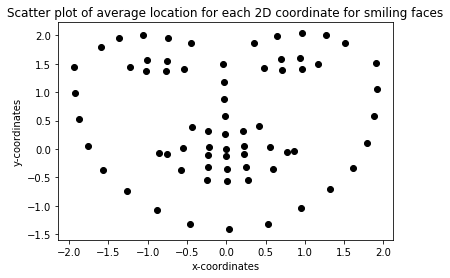

In [117]:
plt.scatter(mean_x_smiling, mean_y_smiling, color = "black")
plt.title("Scatter plot of average location for each 2D coordinate for smiling faces")
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")
plt.savefig('y-versus-x-smiling_faces.svg')
plt.show()

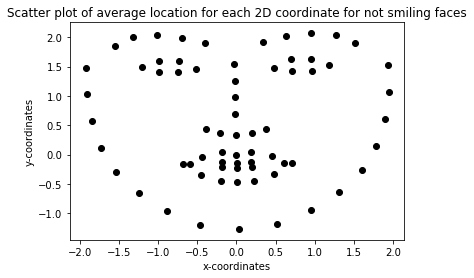

In [118]:
plt.scatter(mean_x_not_smiling, mean_y_not_smiling, color = "black")
plt.title("Scatter plot of average location for each 2D coordinate for not smiling faces")
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")
plt.savefig('y-versus-x-not-smiling_faces.svg')
plt.show()

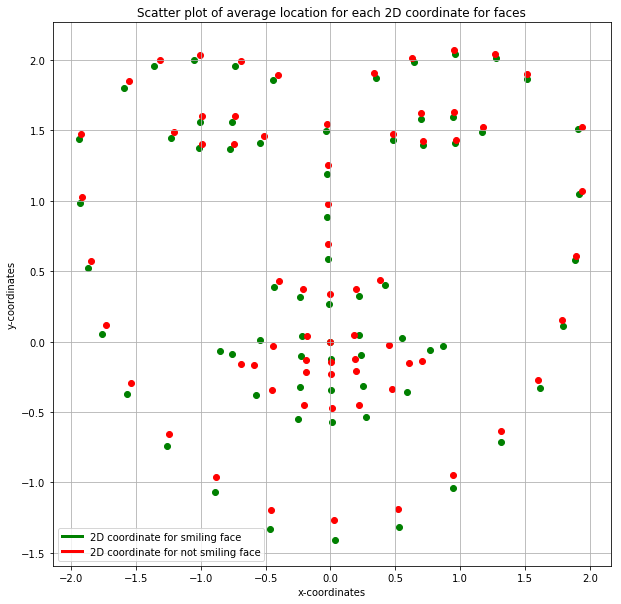

In [121]:
from matplotlib.lines import Line2D

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(mean_x_smiling, mean_y_smiling, color = "green")
plt.scatter(mean_x_not_smiling, mean_y_not_smiling, color = "red")
plt.title("Scatter plot of average location for each 2D coordinate for faces")
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")

colors = ['green', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['2D coordinate for smiling face', '2D coordinate for not smiling face']
plt.legend(lines, labels)

plt.grid(True)

plt.savefig('y-versus-x-faces.svg')
plt.show()

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [123]:
dt_2 = DecisionTreeClassifier(max_depth=2, random_state=2001)

In [124]:
dt_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2001,
            splitter='best')

In [125]:
dt_8 = DecisionTreeClassifier(max_depth=8, random_state=2001)

In [126]:
dt_20 = DecisionTreeClassifier(max_depth=20, random_state=2001)

In [127]:
dt_8.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2001,
            splitter='best')

In [128]:
dt_20.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2001,
            splitter='best')

In [129]:
y_pred_train_2 = dt_2.predict(X_train)

In [130]:
y_pred_train_8 = dt_8.predict(X_train)

In [131]:
y_pred_train_20 = dt_20.predict(X_train)

In [132]:
y_pred_test_2 = dt_2.predict(X_test)

In [133]:
y_pred_test_8 = dt_8.predict(X_test)

In [213]:
y_pred_test_20 = dt_20.predict(X_test)

In [141]:
acc_train_2 = accuracy_score(y_train, y_pred_train_2)
acc_train_2

0.7947916666666667

In [143]:
acc_train_8 = accuracy_score(y_train, y_pred_train_8)
acc_train_8

0.9335416666666667

In [145]:
acc_train_20 = accuracy_score(y_train, y_pred_train_20)
acc_train_20

1.0

In [142]:
acc_test_2 = accuracy_score(y_test, y_pred_test_2)
acc_test_2

0.7816666666666666

In [144]:
acc_test_8 = accuracy_score(y_test, y_pred_test_8)
acc_test_8

0.8408333333333333

In [146]:
acc_test_20 = accuracy_score(y_test, y_pred_test_20)
acc_test_20

0.8158333333333333

In [150]:
features = [f for f in X_train.columns]
len(features)

136

In [156]:
imp_features = list(zip(dt_8.feature_importances_, features))

In [157]:
imp_features[:2]

[(0.0, 'x0'), (0.0017178907147957524, 'y0')]

In [158]:
imp_features.sort(reverse=True)

In [159]:
imp_features[:3]

[(0.33040484928175073, 'x50'),
 (0.08995881431599788, 'y48'),
 (0.08831447209293988, 'y29')]

In [160]:
mean_x_smiling[50]

-0.22101241970021418

In [161]:
mean_y_smiling[50]

0.039740471092077095

In [162]:
mean_x_not_smiling[50]

-0.18105638945233268

In [163]:
mean_y_not_smiling[50]

0.04017403651115618

In [164]:
data_path_eval = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')

In [165]:
classification_eval_1 = pd.read_csv(data_path_eval, delimiter=',')

In [166]:
classification_eval_1.head()

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736


In [167]:
classification_eval_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
gt       1000 non-null int64
alg_1    1000 non-null float64
alg_2    1000 non-null float64
alg_3    1000 non-null float64
alg_4    1000 non-null float64
dtypes: float64(4), int64(1)
memory usage: 39.1 KB


In [253]:
alg_1_T = np.array([int(x>=0.5) for x in classification_eval_1['alg_1']])

In [254]:
alg_1_T.shape

(1000,)

In [255]:
alg_1_T[:5]

array([0, 1, 0, 1, 1])

In [256]:
alg_2_T = np.array([int(x>=0.5) for x in classification_eval_1['alg_2']])

In [257]:
alg_2_T[:5]

array([0, 1, 1, 1, 0])

In [258]:
alg_3_T = np.array([int(x>=0.5) for x in classification_eval_1['alg_3']])

In [259]:
alg_4_T = np.array([int(x>=0.5) for x in classification_eval_1['alg_4']])

In [260]:
gt = np.array(classification_eval_1['gt'])

In [261]:
gt.shape

(1000,)

In [262]:
gt[:5]

array([0, 0, 1, 1, 0])

In [263]:
alg_1_T_count = [int(alg_1_T[i] == gt[i]) for i in range(len(gt))].count(1)

In [264]:
alg_1_T_count

616

In [265]:
alg_2_T_count = [int(alg_2_T[i] == gt[i]) for i in range(len(gt))].count(1)

In [266]:
alg_2_T_count

550

In [267]:
alg_3_T_count = [int(alg_3_T[i] == gt[i]) for i in range(len(gt))].count(1)

In [268]:
alg_3_T_count

321

In [269]:
alg_4_T_count = [int(alg_4_T[i] == gt[i]) for i in range(len(gt))].count(1)

In [270]:
alg_4_T_count

329

In [271]:
from sklearn.metrics import roc_auc_score

In [272]:
roc_1 = roc_auc_score(gt, alg_1_T)
roc_1

0.6799052085659694

In [273]:
roc_2 = roc_auc_score(gt, alg_2_T)
roc_2

0.599729521824363

In [274]:
roc_3 = roc_auc_score(gt, alg_3_T)
roc_3

0.20112781954887216

In [275]:
roc_4 = roc_auc_score(gt, alg_4_T)
roc_4

0.5795739348370927

In [276]:
roc_auc_score(gt, [int(not(bool(x))) for x in gt])

0.0

In [277]:
from sklearn.metrics import roc_curve

In [278]:
from sklearn.metrics import auc

In [279]:
def ROC(score):
    # false positive rate
    fpr = []
    # true positive rate
    tpr = []
    # Iterate thresholds from 0.0, 0.01, ... 1.0
    thresholds = np.arange(0.0, 1.01, .01)

    # get number of positive and negative examples in the dataset
    P = sum(gt)
    N = len(gt) - P

    # iterate through all thresholds and determine fraction of true positives
    # and false positives found at this threshold
    for thresh in thresholds:
        FP=0
        TP=0
        for i in range(len(score)):
            if (score[i] > thresh):
                if gt[i] == 1:
                    TP = TP + 1
                if gt[i] == 0:
                    FP = FP + 1
        fpr.append(FP/float(N))
        tpr.append(TP/float(P))

    xc = fpr[0]
    yc = tpr[0]
    
    Cx = np.linspace(xc, 1.00, num=200, endpoint=False)
    Cy = 200 * [yc]
    
    return [fpr, tpr, Cx, Cy]

In [280]:
score1 = np.array(classification_eval_1['alg_1'])
score2 = np.array(classification_eval_1['alg_2'])
score3 = np.array(classification_eval_1['alg_3'])
score4 = np.array(classification_eval_1['alg_4'])

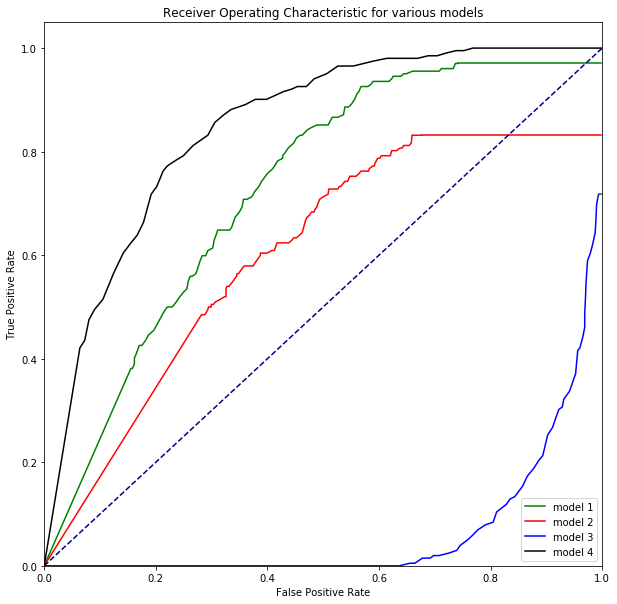

In [281]:
[fpr1, tpr1, Cx1, Cy1] = ROC(score1)
[fpr2, tpr2, Cx2, Cy2] = ROC(score2)
[fpr3, tpr3, Cx3, Cy3] = ROC(score3)
[fpr4, tpr4, Cx4, Cy4] = ROC(score4)

plt.figure(figsize=(10,10))    
plt.plot(fpr1, tpr1, color='green', label='model 1')
plt.plot(Cx1, Cy1, color='green')

plt.plot(fpr2, tpr2, color='red', label='model 2')
plt.plot(Cx2, Cy2, color='red')

plt.plot(fpr3, tpr3, color='blue', label='model 3')
plt.plot(Cx3, Cy3, color='green')

plt.plot(fpr4, tpr4, color='black', label='model 4')
plt.plot(Cx4, Cy4, color='black')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for various models')
plt.legend(loc="lower right")

plt.savefig('ROC_curves.svg')

plt.show()

In [282]:
(tpr3[2], fpr3[2])

(0.698019801980198, 0.9899749373433584)

In [283]:
len(np.arange(0.0, 1.01, 0.01))

101

In [289]:
(tpr3[1]-fpr3[1]+1)/2

0.36019504206059705